Text(0, 0.5, 'Accuracy Score')

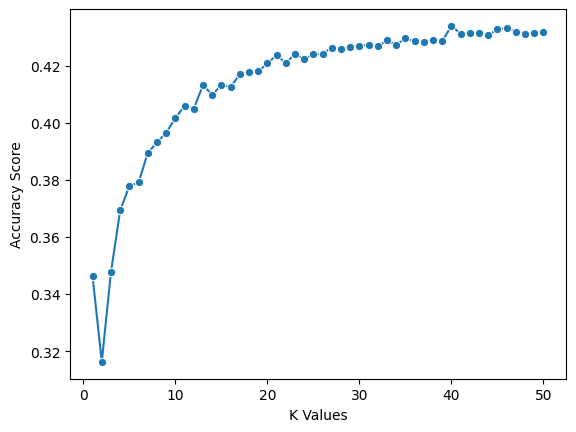

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
import seaborn as sns
from ml_functions import *
from db_functions import *

normalized_db_filename = "normalized.db"
normalized_conn = create_connection(normalized_db_filename)
df = get_incidents_join_locations(normalized_conn)

new_df = df.query("Year == 2023")
X = new_df.drop(['Incident_Type', 'Neighborhood', 'Zip_Code', 'Year'], axis = 1)
y = new_df['Incident_Type']

scores = []
scaler = StandardScaler()
X = scaler.fit_transform(X)

k_values = range(1, 51)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [1]:
max_k = scores.index(max(scores)) + 1
max_score = max(scores)

print(max_k, max(scores))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

knn = KNeighborsClassifier(n_neighbors = max_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

labels = ["ASSAULT", "BURGLARY", "LARCENY/THEFT", "MURDER", "RAPE", "ROBBERY", "SEXUAL ABUSE", "THEFT OF SERVICES", "UUV"]

cm = confusion_matrix(y_test, y_pred, labels = labels)
disp = ConfusionMatrixDisplay(cm, display_labels = ["A", "B", "L/T", "M", "RAPE", "R", "SA", "TOS", "UUV"])
disp.plot()

NameError: name 'scores' is not defined

In [5]:
precision_recall_fscore_support(y_test, y_pred, average = 'macro', zero_division = 1)

(0.7107565971148567, 0.13667533245943747, 0.1188743326243675, None)